Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

Loading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\anura\Downloads\Datixity Project\supermarket_sales - Sheet1.csv")

In [3]:
data.head(10)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Checking and handling missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


# Feature Engineering

In [7]:
# Calculate the average transaction value
average_transaction_value = data['Total'].mean()
print("Average Transaction Value:", average_transaction_value)

Average Transaction Value: 322.966749


In [8]:
# Create a new binary target variable: 1 if transaction is above average, 0 if below
data['Above_Average'] = (data['Total'] > average_transaction_value).astype(int)

# Preview the updated dataset
print(data[['Total', 'Above_Average']].head())

      Total  Above_Average
0  548.9715              1
1   80.2200              0
2  340.5255              1
3  489.0480              1
4  634.3785              1


In [9]:
# Encode categorical features using LabelEncoder for simplicity
le = LabelEncoder()
data['Product line'] = le.fit_transform(data['Product line'])
data['Branch'] = le.fit_transform(data['Branch'])
data['Payment'] = le.fit_transform(data['Payment'])
data['Customer type'] = le.fit_transform(data['Customer type'])

# Model Selection

In [10]:
# Define features (X) and target (y)
features = ['Product line', 'Branch', 'Quantity', 'Payment', 'Customer type']
X = data[features]
y = data['Above_Average']

In [11]:
# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Models

In [12]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [16]:
# Logistic Regression Predictions
y_pred_log_reg = log_reg.predict(X_test)


In [17]:
# Decision Tree Predictions
y_pred_tree = decision_tree.predict(X_test)

In [18]:
# Linear Regression Predictions
y_pred = lin_reg.predict(X_test)

In [19]:
# Random Forest predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [20]:
# Defining a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [21]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Evaluation for Logistic Regression
Accuracy: 0.78
Precision: 0.8115942028985508
Recall: 0.6436781609195402
F1-Score: 0.7179487179487178

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       113
           1       0.81      0.64      0.72        87

    accuracy                           0.78       200
   macro avg       0.79      0.76      0.77       200
weighted avg       0.78      0.78      0.78       200



In [22]:
# Evaluate Decision Tree
evaluate_model(y_test, y_pred_tree, "Decision Tree")

Evaluation for Decision Tree
Accuracy: 0.72
Precision: 0.7246376811594203
Recall: 0.5747126436781609
F1-Score: 0.6410256410256409

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       113
           1       0.72      0.57      0.64        87

    accuracy                           0.72       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.72      0.72      0.71       200



In [23]:
# Evaluate Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.23
R-Squared: 0.06418472179839274


In [24]:
# Evaluate Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       113
           1       0.73      0.75      0.74        87

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



# 6. Feature Importance

In [25]:
# For Logistic Regression
print("\nLogistic Regression Feature Importance:")
log_reg_coef = pd.DataFrame({
    'Feature': features,
    'Importance': log_reg.coef_[0]
}).sort_values(by='Importance', ascending=False)
print(log_reg_coef)


Logistic Regression Feature Importance:
         Feature  Importance
2       Quantity    0.567770
0   Product line    0.102179
3        Payment    0.083838
1         Branch    0.041106
4  Customer type    0.029199


In [26]:
# For Decision Tree
print("\nDecision Tree Feature Importance:")
tree_importances = pd.DataFrame({
    'Feature': features,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(tree_importances)


Decision Tree Feature Importance:
         Feature  Importance
2       Quantity    0.553478
0   Product line    0.197801
3        Payment    0.094375
1         Branch    0.090574
4  Customer type    0.063772


# Strategies to Increase Customer Transaction Amounts

For this we need to do the EDA 

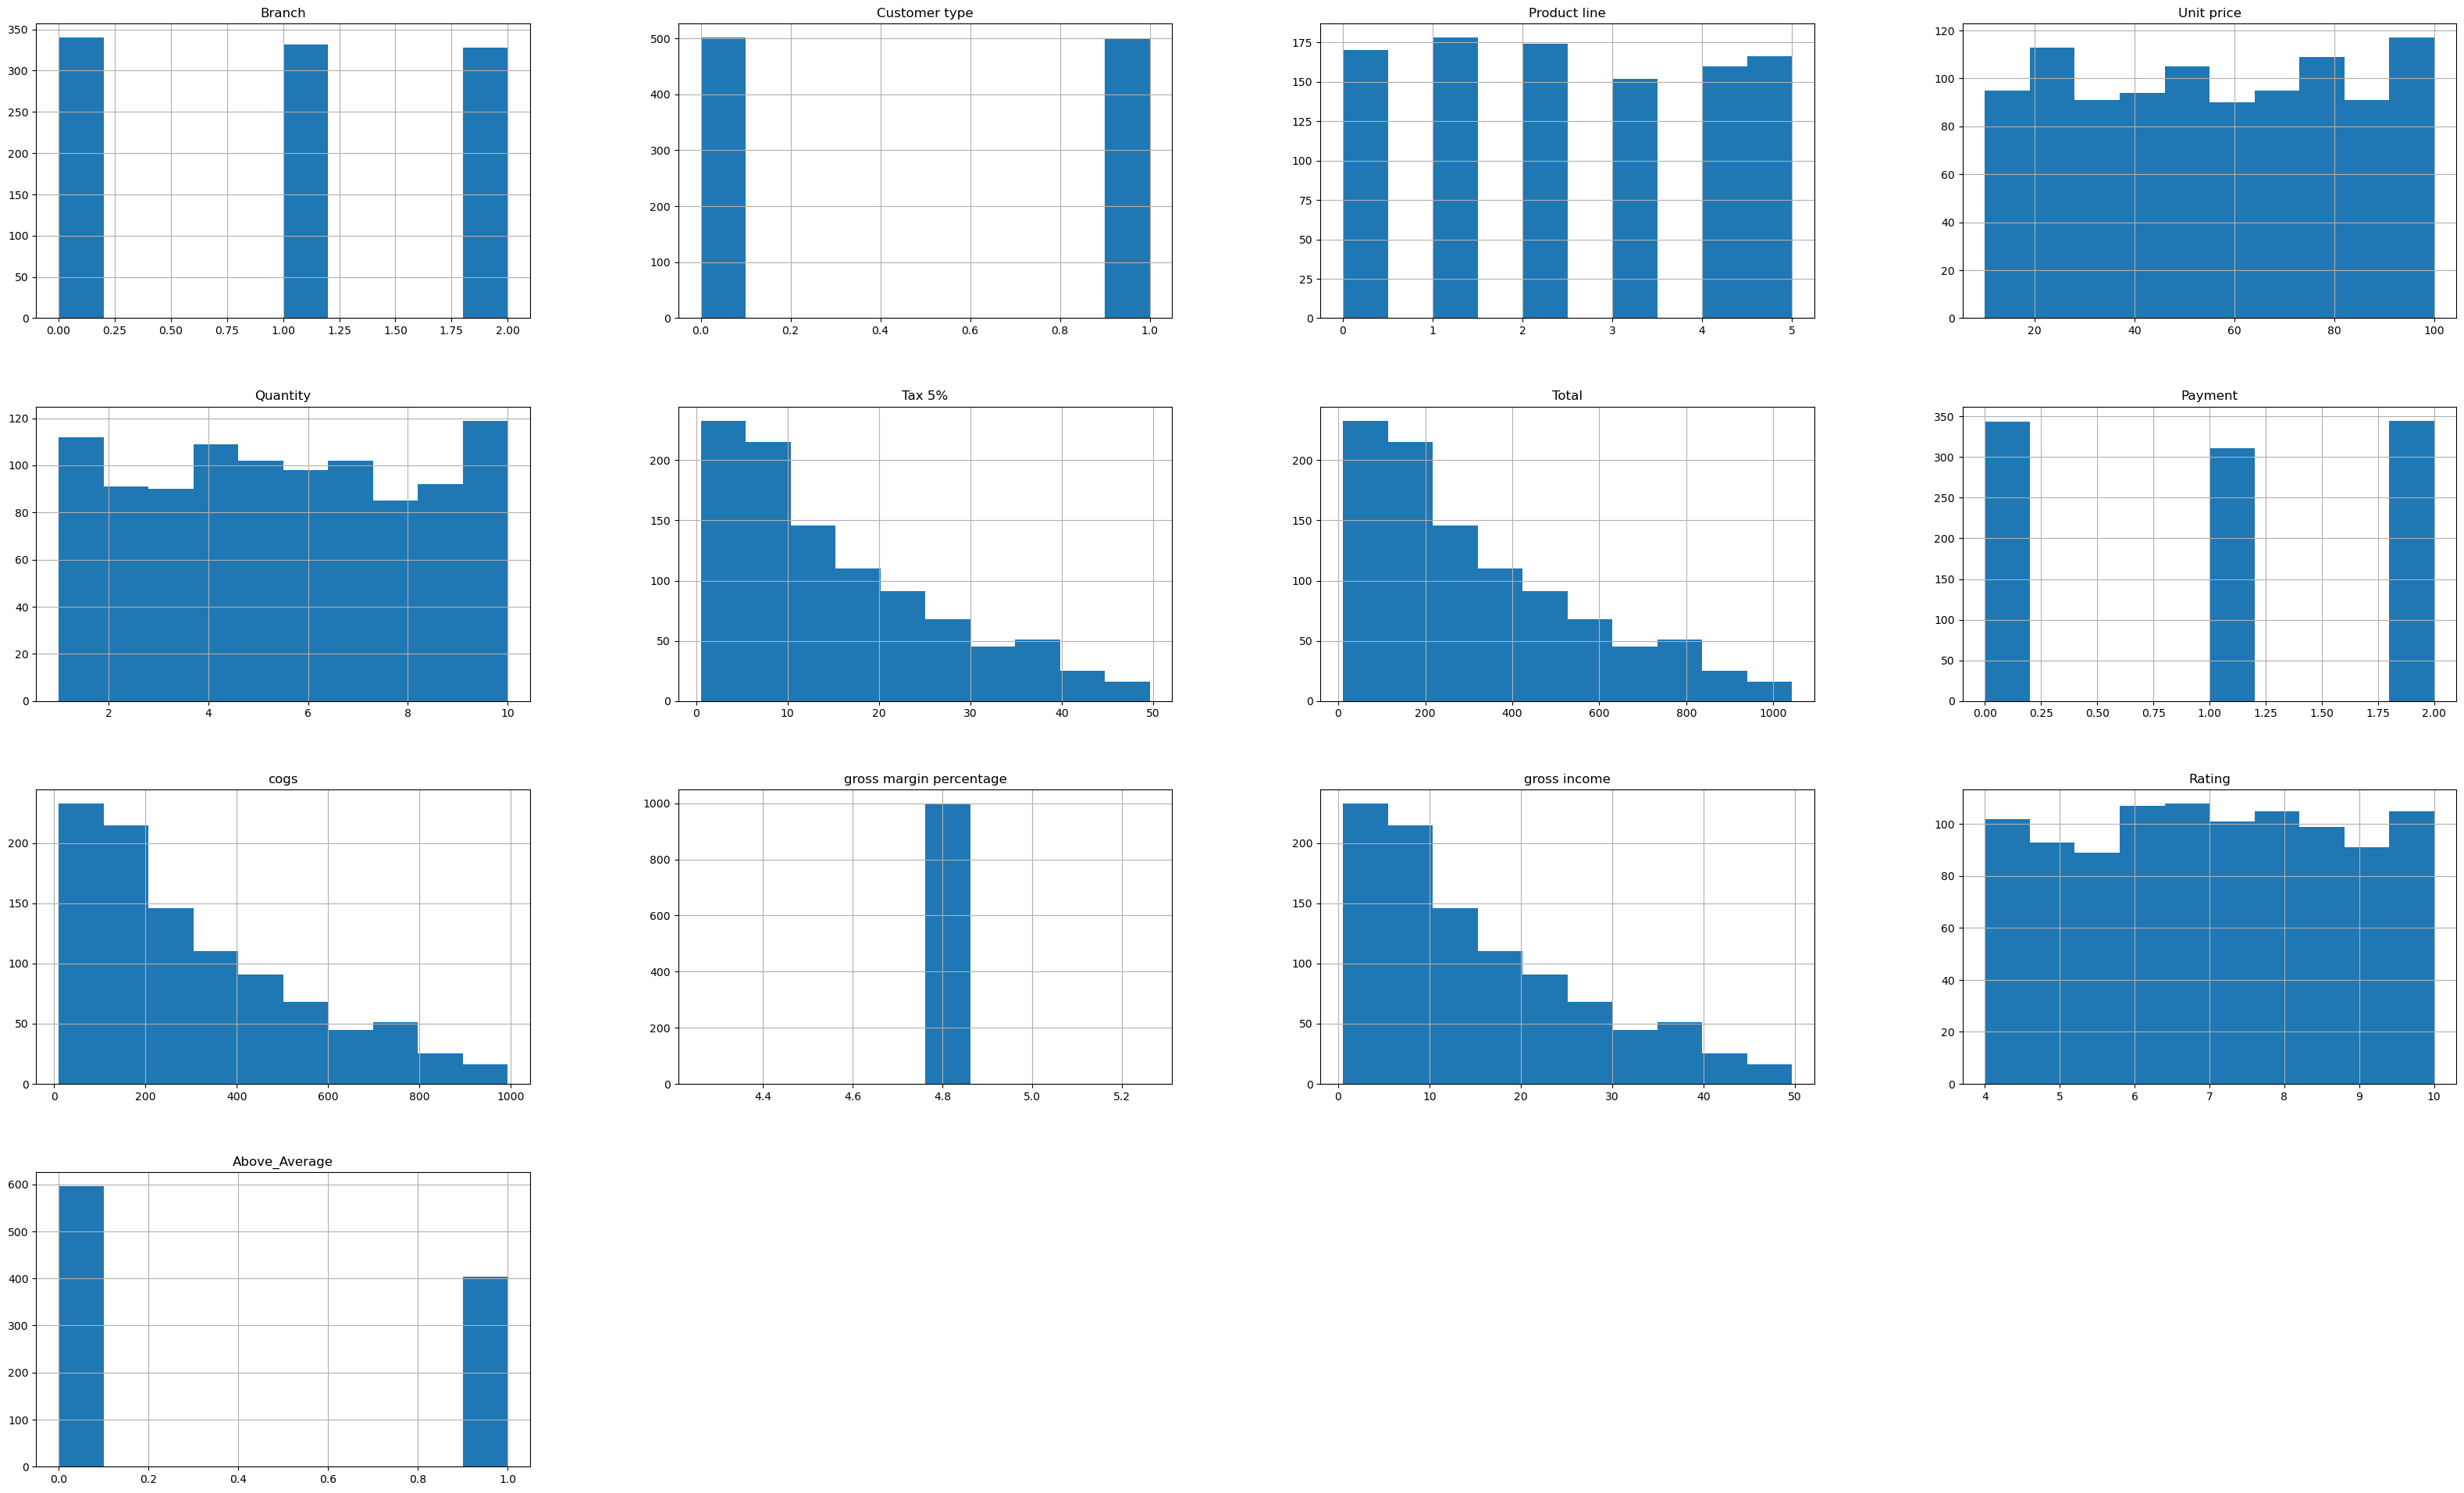

In [27]:
# Histogram PLot
data.hist(figsize=(40,24))
plt.show()

In [28]:
non_numeric_columns = data.select_dtypes(exclude=[float, int])
print(non_numeric_columns.columns)

Index(['Invoice ID', 'City', 'Gender', 'Date', 'Time'], dtype='object')


In [29]:
### Identify Categorical Columns
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [31]:
### 2.4 Feature Scaling (Optional but Recommended for Some Models)
# Initialize StandardScaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 
                  'gross margin percentage', 'gross income', 'Rating']

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [32]:
### Initialize Label Encoder
le = LabelEncoder()

### Apply Label Encoding
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [33]:
datas=data.drop(non_numeric_columns, axis=1)

In [34]:
data.corr


<bound method DataFrame.corr of       Invoice ID  Branch  City  Customer type  Gender  Product line  \
0    750-67-8428       0     2              0       0             3   
1    226-31-3081       2     1              1       0             0   
2    631-41-3108       0     2              1       1             4   
3    123-19-1176       0     2              0       1             3   
4    373-73-7910       0     2              1       1             5   
..           ...     ...   ...            ...     ...           ...   
995  233-67-5758       2     1              1       1             3   
996  303-96-2227       1     0              1       0             4   
997  727-02-1313       0     2              0       1             2   
998  347-56-2442       0     2              1       1             4   
999  849-09-3807       0     2              0       0             1   

     Unit price  Quantity    Tax 5%      Total       Date   Time  Payment  \
0      0.718160  0.509930  0.919607   

In [39]:
X=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [44]:
data.drop(X, axis=1)

,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Above_Average
0,750-67-8428,0.718160,0.509930,0.919607,548.9715,1/5/2019,13:08,0.919607,0.0,0.919607,1.238443,1
1,226-31-3081,-1.525303,-0.174540,-0.987730,80.2200,3/8/2019,10:29,-0.987730,0.0,-0.987730,1.529527,0
2,631-41-3108,-0.352781,0.509930,0.071446,340.5255,3/3/2019,13:23,0.071446,0.0,0.071446,0.248760,1
3,123-19-1176,0.096214,0.852165,0.675780,489.0480,1/27/2019,20:33,0.675780,0.0,0.675780,0.830927,1
4,373-73-7910,1.156959,0.509930,1.267125,634.3785,2/8/2019,10:37,1.267125,0.0,1.267125,-0.973790,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,-0.578600,-1.543480,-1.141750,42.3675,1/29/2019,13:46,-1.141750,0.0,-1.141750,-0.449840,0
996,303-96-2227,1.574989,1.536635,2.846340,1022.4900,3/2/2019,17:16,2.846340,0.0,2.846340,-1.497741,1
997,727-02-1313,-0.899958,-1.543480,-1.178109,33.4320,2/9/2019,13:22,-1.178109,0.0,-1.178109,0.423410,0
998,347-56-2442,0.383208,-1.543480,-1.032932,69.1110,2/22/2019,15:33,-1.032932,0.0,-1.032932,-1.672391,0


In [50]:
data_numeric = data.select_dtypes(include=[float, int])  # Select only numeric columns
correlation_matrix = data_numeric.corr()
print(correlation_matrix)

                           Branch      City  Customer type    Gender  \
Branch                   1.000000 -0.507401      -0.019608 -0.056318   
City                    -0.507401  1.000000       0.004899  0.012219   
Customer type           -0.019608  0.004899       1.000000  0.039996   
Gender                  -0.056318  0.012219       0.039996  1.000000   
Product line            -0.053938  0.008811      -0.036800  0.005193   
Unit price               0.028202 -0.013763      -0.020238  0.015445   
Quantity                 0.015964 -0.002121      -0.016763 -0.074258   
Tax 5%                   0.041047 -0.012812      -0.019670 -0.049451   
Total                    0.041047 -0.012812      -0.019670 -0.049451   
Payment                 -0.050104  0.019094       0.018073  0.044578   
cogs                     0.041047 -0.012812      -0.019670 -0.049451   
gross margin percentage       NaN       NaN            NaN       NaN   
gross income             0.041047 -0.012812      -0.019670 -0.04

<Axes: >

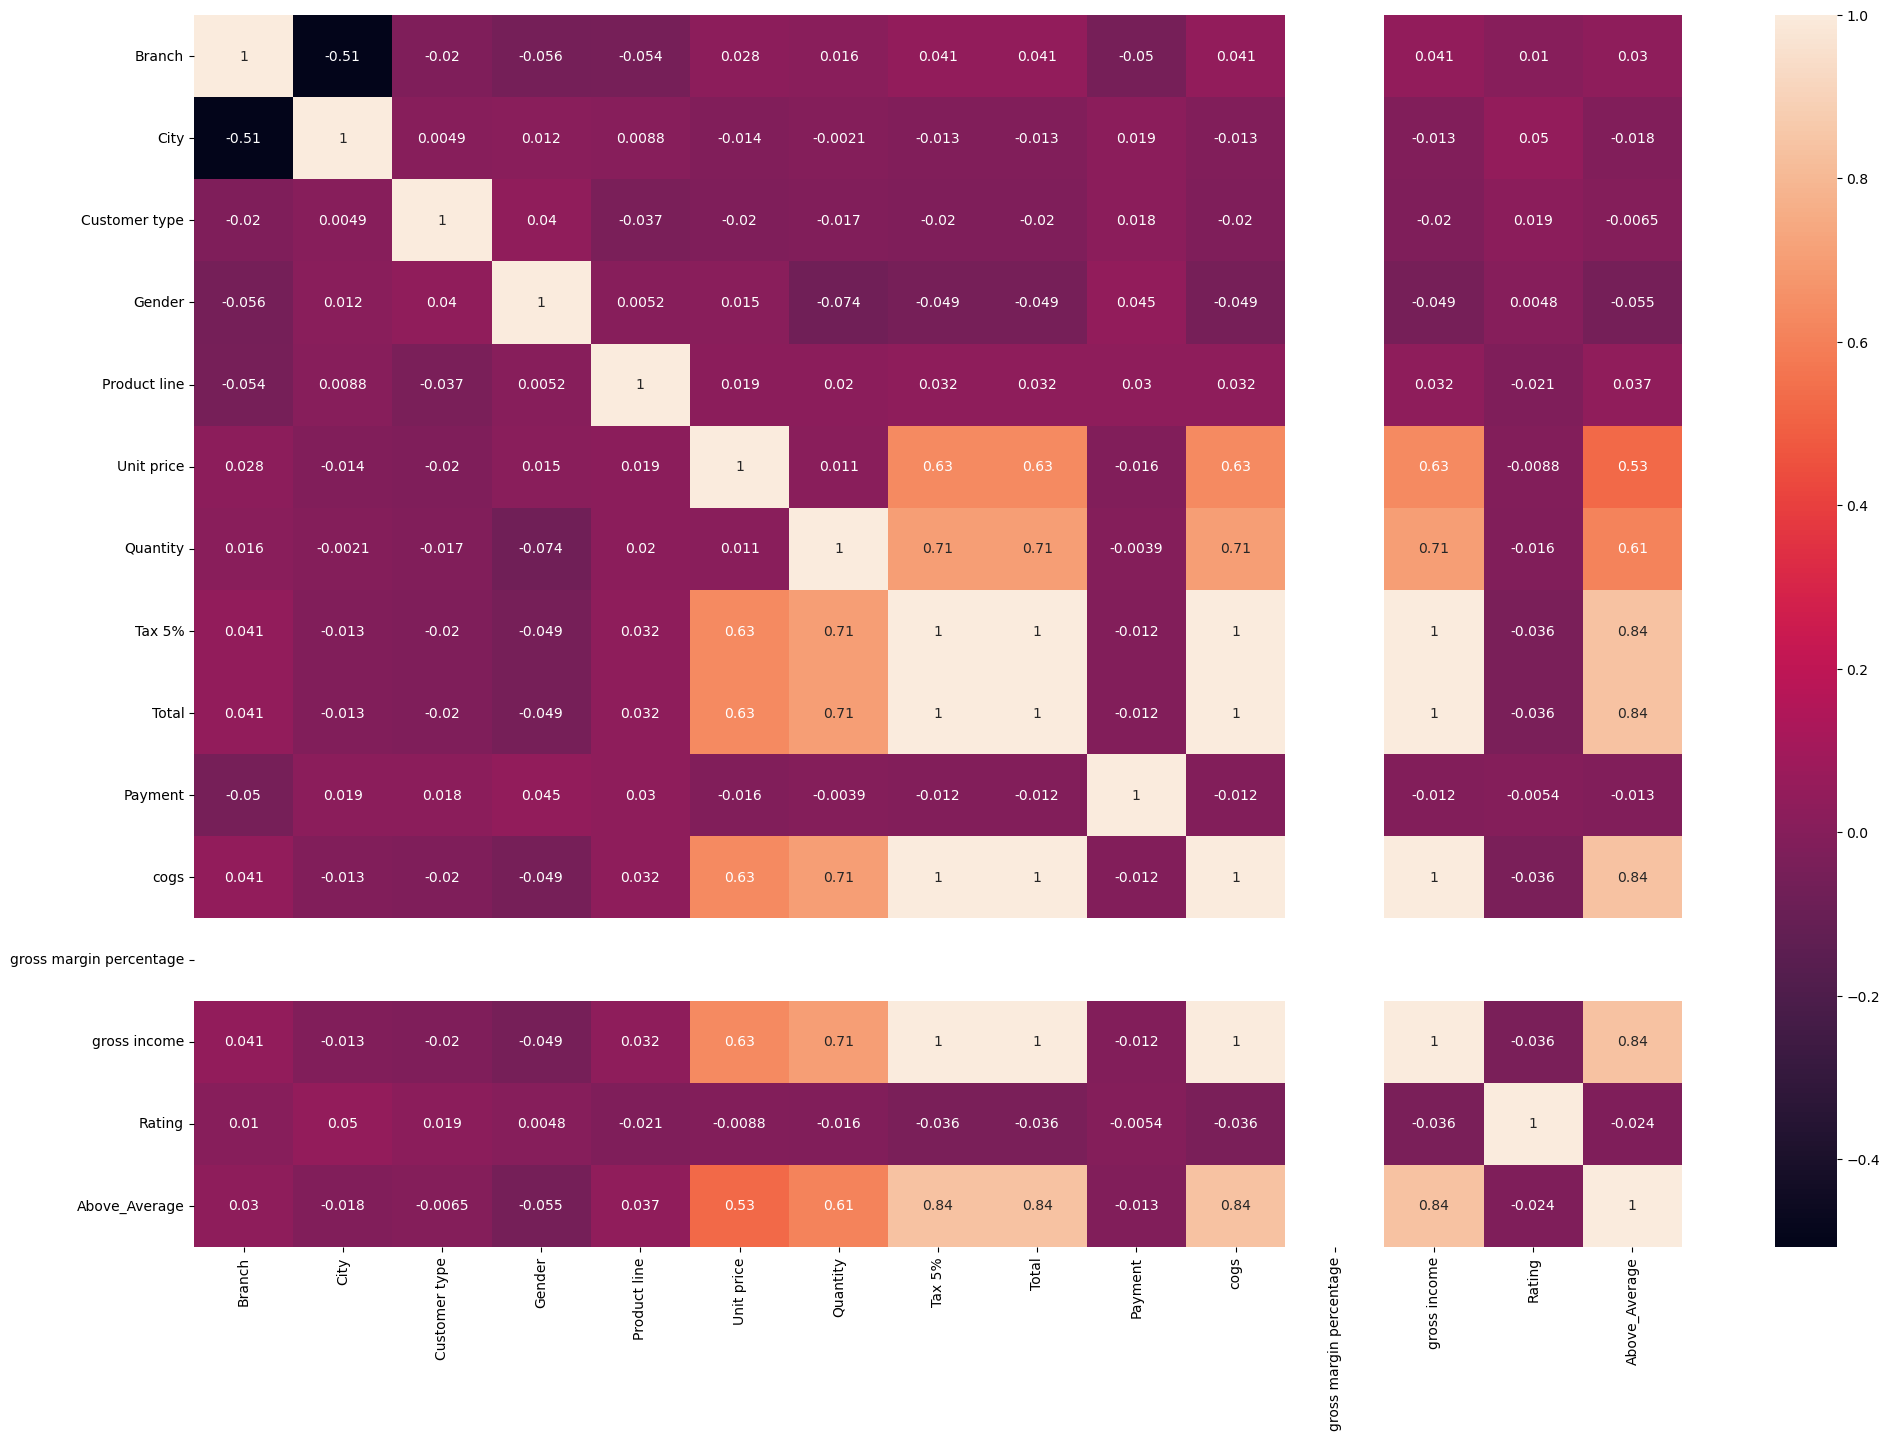

In [52]:
# Generating Heatmap 
plt.figure(figsize = (24,16))
sns.heatmap(correlation_matrix , annot=True)

# BUSINESS PROBLEM:

1. Develop Personalized Marketing Strategies Based on Product Categories Leading to Higher Spend

In [54]:
# 1. Identify High-Spending Product Categories
# Group by 'Product line' and calculate average transaction value per product category
product_line_avg = data.groupby('Product line')['Total'].mean().reset_index()
product_line_avg = product_line_avg.sort_values(by='Total', ascending=False)
print("\nAverage Spend per Product Line:\n", product_line_avg)


Average Spend per Product Line:
    Product line       Total
4             4  336.636956
5             5  332.065220
3             3  323.643020
2             2  322.671517
0             0  319.632538
1             1  305.089298


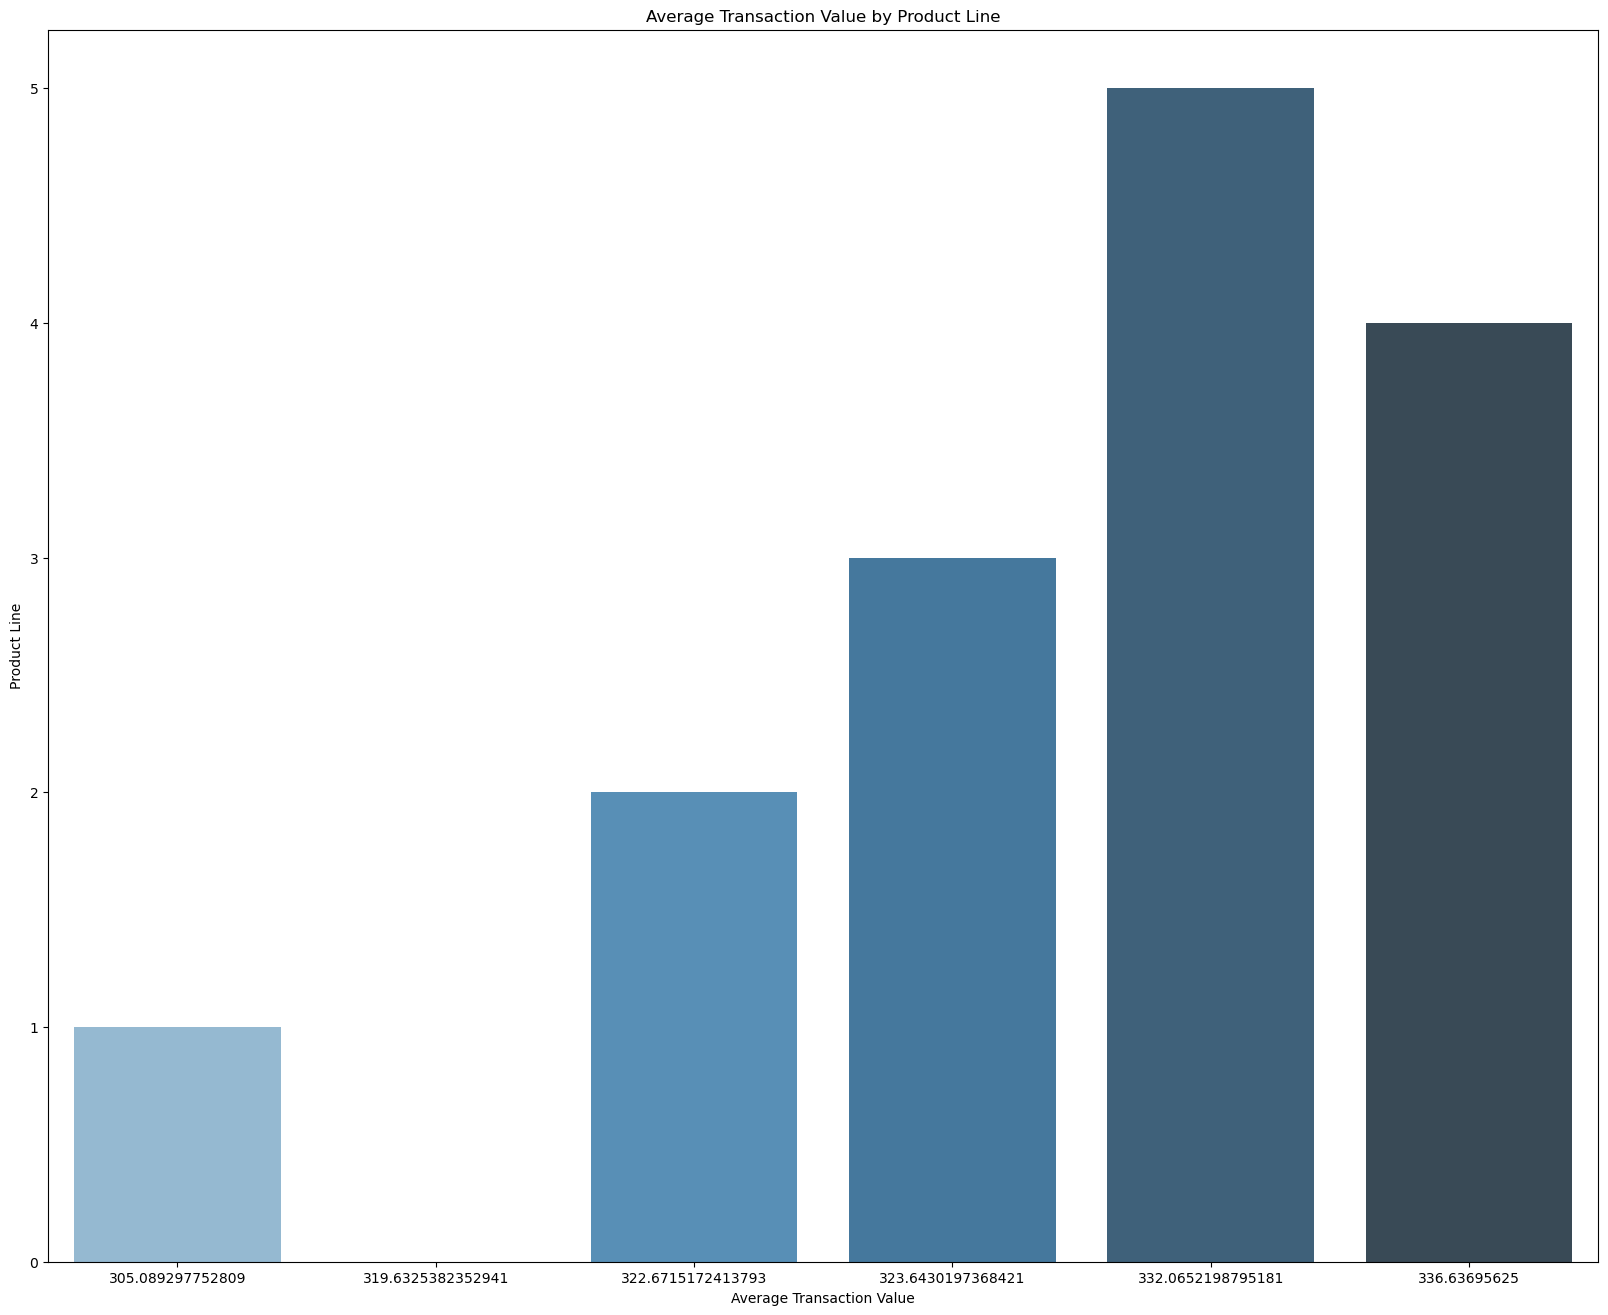

In [55]:
# Plot the average spend per product line for better visualization
plt.figure(figsize=(20, 16))
sns.barplot(x='Total', y='Product line', data=product_line_avg, palette='Blues_d')
plt.title('Average Transaction Value by Product Line')
plt.xlabel('Average Transaction Value')
plt.ylabel('Product Line')
plt.show()

2. Identify Low-Spending Product Categories and Customers

In [56]:
# Calculate overall average transaction value
overall_avg_transaction_value = data['Total'].mean()
print("\nOverall Average Transaction Value: ", overall_avg_transaction_value)


Overall Average Transaction Value:  322.966749


In [57]:
# Identify product lines with below-average transaction values
low_spend_categories = product_line_avg[product_line_avg['Total'] < overall_avg_transaction_value]['Product line'].tolist()
print("\nLow-Spending Product Categories:", low_spend_categories)


Low-Spending Product Categories: [2, 0, 1]


In [58]:
# Customers who purchased from these low-spending categories
low_spend_customers = data[data['Product line'].isin(low_spend_categories)]
low_spend_customer_ids = low_spend_customers['Invoice ID'].unique()
print("\nCustomers who purchased from low-spending categories:\n", low_spend_customers[['Invoice ID', 'Product line', 'Total']].head())


Customers who purchased from low-spending categories:
      Invoice ID  Product line     Total
1   226-31-3081             0   80.2200
5   699-14-3026             0  627.6165
6   355-53-5943             0  433.6920
9   692-92-5582             2  172.7460
10  351-62-0822             1   60.8160


3. Loyalty Programs or Discounts for Lower-Performing Branches


In [59]:
# Calculate average transaction value per branch
branch_avg = data.groupby('Branch')['Total'].mean().reset_index()
branch_avg = branch_avg.sort_values(by='Total')
print("\nAverage Transaction Value per Branch:\n", branch_avg)


Average Transaction Value per Branch:
    Branch       Total
0       0  312.354031
1       1  319.872506
2       2  337.099715


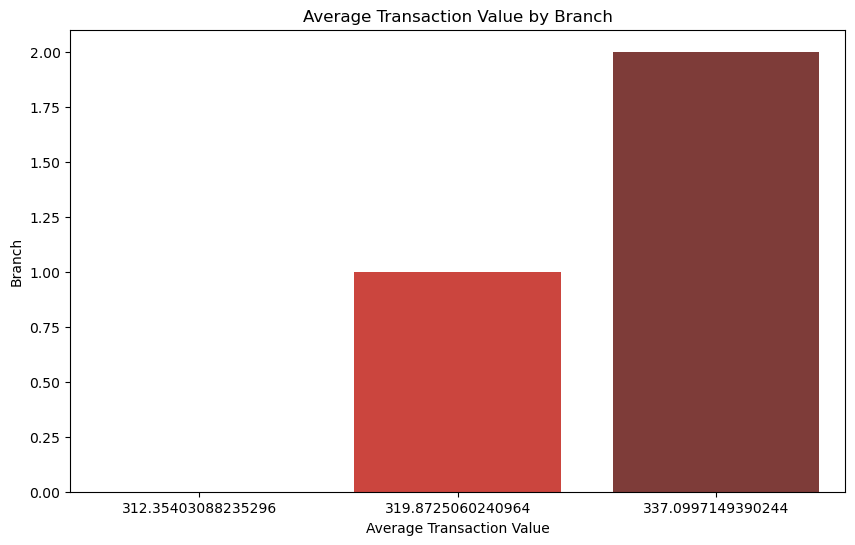

In [60]:
# Plot branch performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Branch', data=branch_avg, palette='Reds_d')
plt.title('Average Transaction Value by Branch')
plt.xlabel('Average Transaction Value')
plt.ylabel('Branch')
plt.show()

In [61]:
# Identify lower-performing branches (below overall average)
low_performing_branches = branch_avg[branch_avg['Total'] < overall_avg_transaction_value]['Branch'].tolist()
print("\nLower-Performing Branches: ", low_performing_branches)


Lower-Performing Branches:  [0, 1]


4. Strategy Recommendations

In [62]:
# Customers in lower-performing branches
customers_in_low_branches = data[data['Branch'].isin(low_performing_branches)]
print("\nCustomers in Lower-Performing Branches:\n", customers_in_low_branches[['Invoice ID', 'Branch', 'Total']].head())


Customers in Lower-Performing Branches:
     Invoice ID  Branch     Total
0  750-67-8428       0  548.9715
2  631-41-3108       0  340.5255
3  123-19-1176       0  489.0480
4  373-73-7910       0  634.3785
6  355-53-5943       0  433.6920


# CONCLUSION:

In [63]:
# 4.1 Personalized Marketing Based on High-Spending Product Categories
print("\n--- Personalized Marketing ---")
print("Focus marketing campaigns on the following high-spending product lines:\n")
print(product_line_avg[product_line_avg['Total'] > overall_avg_transaction_value]['Product line'].tolist())
print("- Tailor promotions and offers based on these high-spending categories to encourage repeat purchases.")

# 4.2 Promote Additional Services or Products to Customers in Low-Spending Categories
print("\n--- Cross-Selling and Upselling ---")
print("Focus on the following low-spending product lines for cross-selling or upselling opportunities:\n")
print(low_spend_categories)
print("- Offer complementary or bundled products to customers purchasing from these low-transaction categories.")
print("- Recommend higher-value items based on their purchase history.")

# 4.3 Use Loyalty Programs or Discounts for Lower-Performing Branches
print("\n--- Loyalty Programs for Lower-Performing Branches ---")
print("Implement loyalty programs or discounts for the following lower-performing branches:\n")
print(low_performing_branches)
print("- Provide exclusive discounts or reward points to incentivize larger purchases in these branches.")
print("- Conduct localized promotions or events to boost branch-specific performance.")



--- Personalized Marketing ---
Focus marketing campaigns on the following high-spending product lines:

[4, 5, 3]
- Tailor promotions and offers based on these high-spending categories to encourage repeat purchases.

--- Cross-Selling and Upselling ---
Focus on the following low-spending product lines for cross-selling or upselling opportunities:

[2, 0, 1]
- Offer complementary or bundled products to customers purchasing from these low-transaction categories.
- Recommend higher-value items based on their purchase history.

--- Loyalty Programs for Lower-Performing Branches ---
Implement loyalty programs or discounts for the following lower-performing branches:

[0, 1]
- Provide exclusive discounts or reward points to incentivize larger purchases in these branches.
- Conduct localized promotions or events to boost branch-specific performance.


### High-spending product lines:

In [93]:
product_line_mapping = {0: 'Electronic accessories', 1: 'Food and beverages', 2: 'Fashion accessories', 3: 'Health and beauty', 4: 'Home and lifestyle', 5: 'Sports and travel'}
high_spending_product_lines = [4, 5, 3]
print("High-Spending Product Lines:")
for line in high_spending_product_lines:
    print(product_line_mapping[line])


High-Spending Product Lines:
Home and lifestyle
Sports and travel
Health and beauty


### Low-spending product lines:


In [94]:
low_spending_product_lines = [2, 0, 1]
print("\nLow-Spending Product Lines:")
for line in low_spending_product_lines:
    print(product_line_mapping[line])


Low-Spending Product Lines:
Fashion accessories
Electronic accessories
Food and beverages


### Low-performance Product Lines:

In [102]:
low_performing_branches = [0, 1]
print("\nLow-performing-branches:")
for line in low_performing_branches:
    print(product_line_mapping[line])


Low-performing-branches:
Electronic accessories
Food and beverages
